<a href="https://colab.research.google.com/github/MDASIFKARIM/ADVANCE-DATABASE-MANAGEMENT-SYSTEM/blob/main/supplyChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

2

In [ ]:
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')
#df2 = pd.read_csv('DescriptionDataCoSupplyChain.csv', encoding='ISO-8859-1')
#df3 = pd.read_csv('tokenized_access_logs.csv', encoding='ISO-8859-1')
#df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


3

In [ ]:
np.sum(df.isna())

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


4

In [ ]:
# Replace missing values in 'Customer Zipcode' and 'Order Zipcode' with 0
df['Customer Zipcode'] = df['Customer Zipcode'].fillna(0)
df['Order Zipcode'] = df['Order Zipcode'].fillna(0)

# Replace missing values in 'Customer Fname' with "NotDetermined"
df['Customer Fname'] = df['Customer Fname'].fillna("NotDetermined")

# Create 'Customer Full Name' by combining 'Customer Fname' and 'Customer Lname'
df['Customer Full Name'] = df['Customer Fname'].astype(str) + df['Customer Lname'].astype(str)

5

In [ ]:
dfData=df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Product Description','Product Image','Order Zipcode','Customer Zipcode'],axis=1)
dfData.shape

(180519, 44)

6

In [ ]:
dfData.columns = [col.lower().replace(' ', '_') for col in dfData.columns]
dfData.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)
dfData.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id',
       'order_date_dateorders', 'order_id', 'order_item_cardprod_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_item_total',
       'order_profit_per_order', 'order_region', 'order_state', 'order_status',
       'product_card_id', 'product_category_id', 'product_name',
       'product_price', 'shipping_date_dateorders', 'shipping_mode',
       'customer_full_name'],
      dtype='object')

7

In [ ]:
Delivery=dfData.groupby('delivery_status')
Market = dfData.groupby('market')
Region = dfData.groupby('order_region')
Customer=dfData.groupby('customer_segment')
Category=dfData.groupby('category_name')
Shipping=dfData.groupby('shipping_mode')
Region=dfData.groupby('order_region')


8

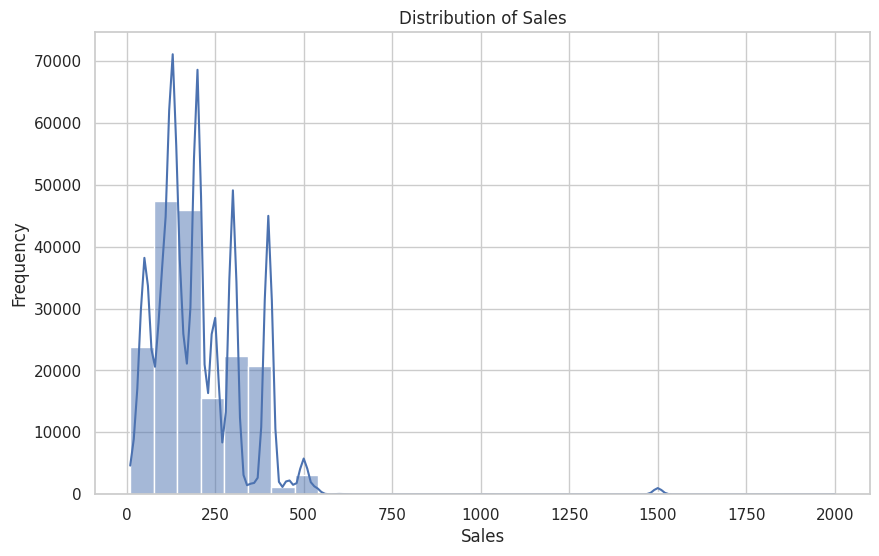

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfData, x='sales', bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

9

In [ ]:
customer_segment_counts = dfData['customer_segment'].value_counts()

10

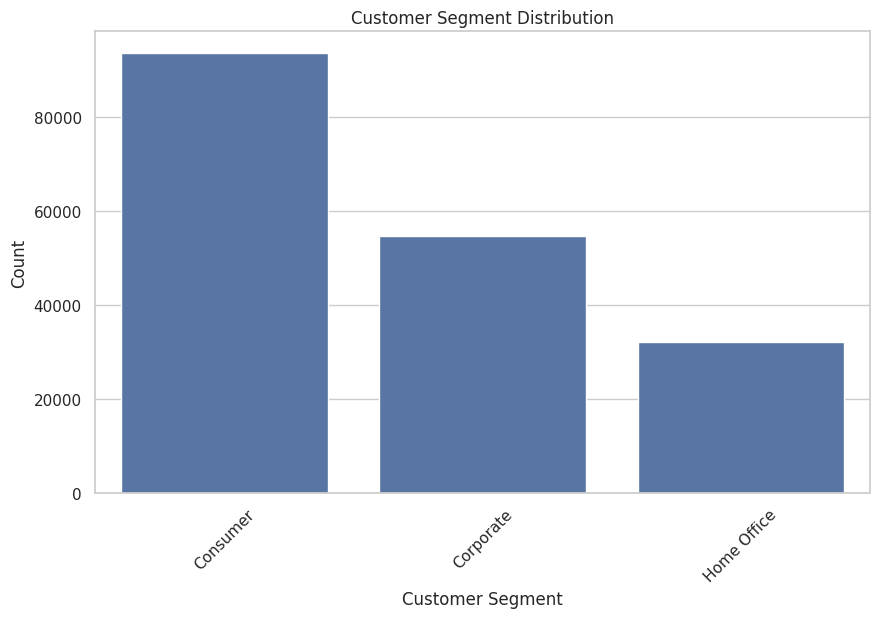

In [ ]:
# Plotting Customer Segment Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_segment_counts.index, y=customer_segment_counts.values)
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

11

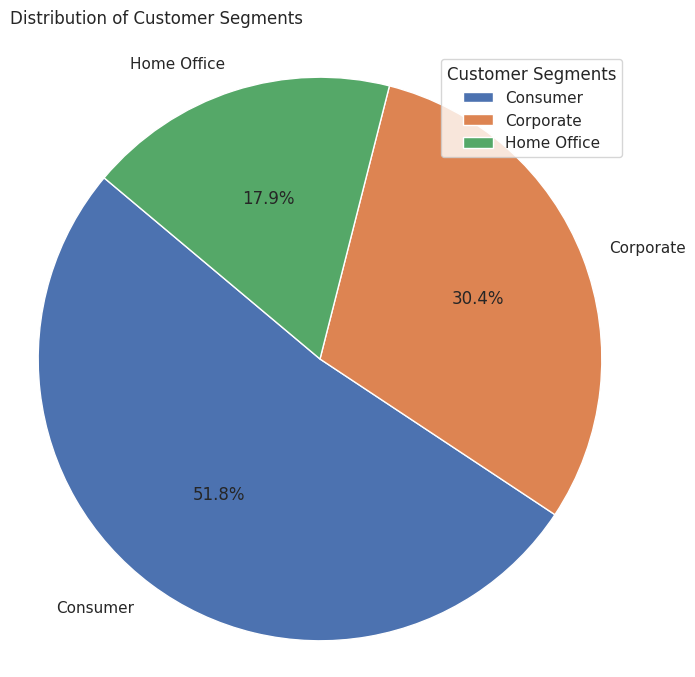

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(customer_segment_counts, labels=customer_segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Segments',loc='left', pad=20)
plt.axis('equal')
plt.legend(customer_segment_counts.index, title='Customer Segments', loc='best')
plt.show()

12

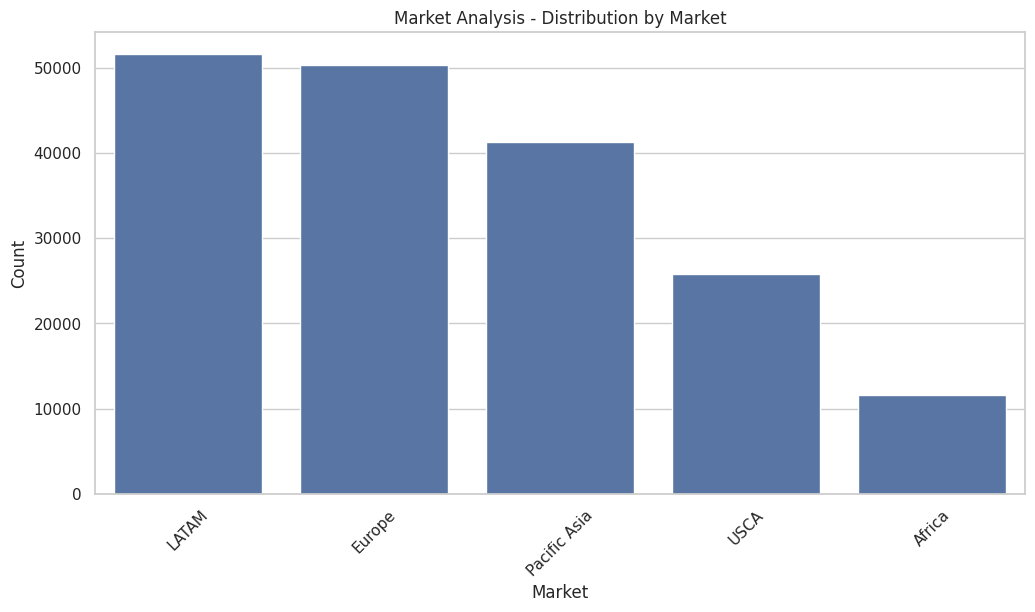

In [ ]:
market_counts = dfData['market'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=market_counts.index, y=market_counts.values)
plt.title('Market Analysis - Distribution by Market')
plt.xlabel('Market')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

13

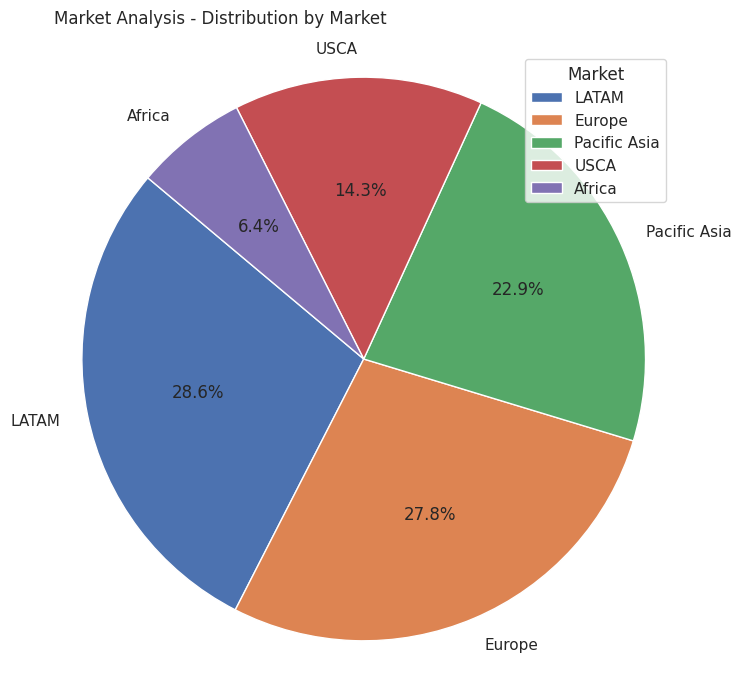

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(market_counts, labels=market_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Analysis - Distribution by Market', loc='left', pad=20)
plt.axis('equal')
plt.legend(market_counts.index, title='Market', loc='best')
plt.show()


14

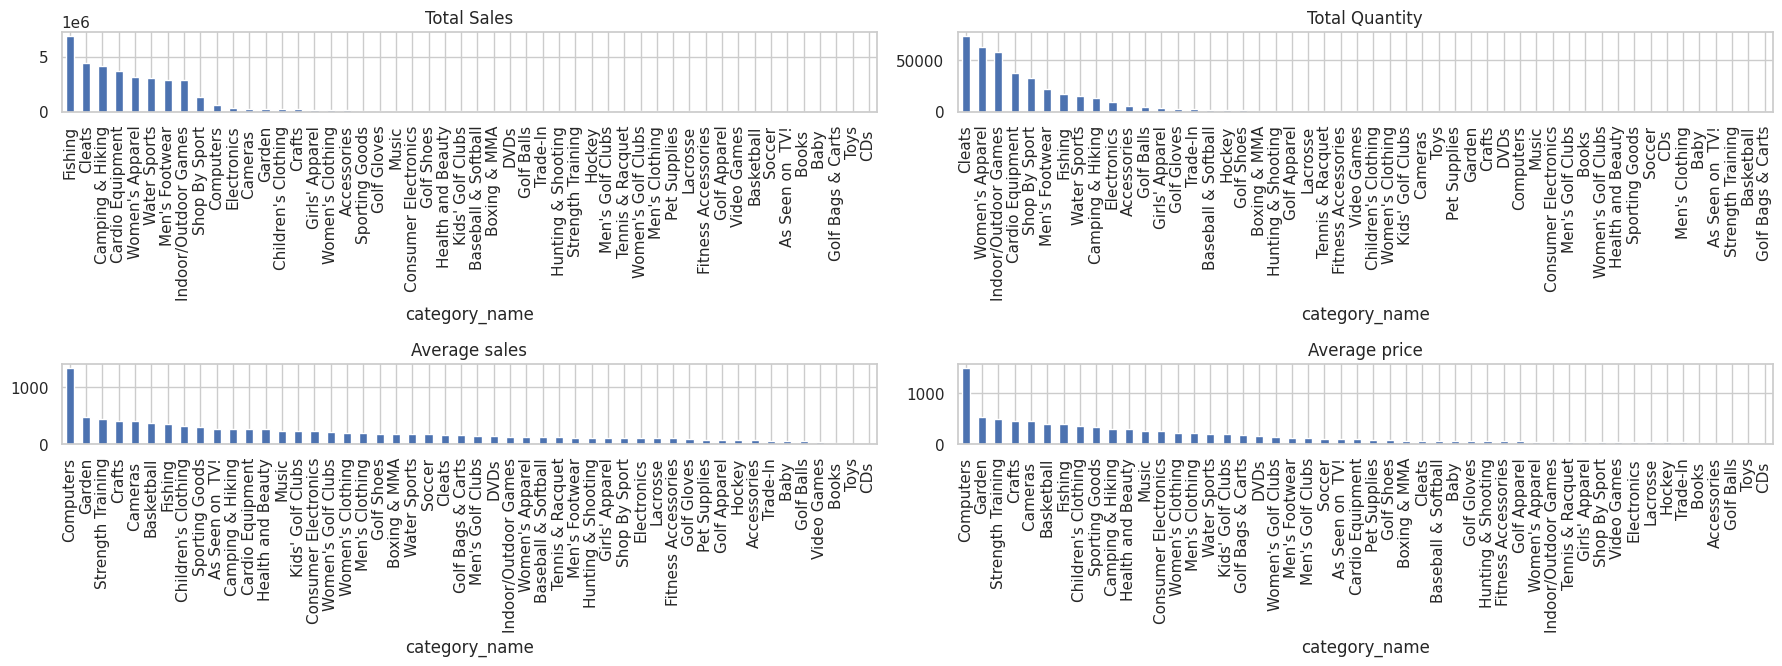

In [ ]:
plt.figure(figsize=(10,12))
plt.subplot(6, 2, 1)
Category['sales'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Total Sales")

plt.subplot(6, 2, 2)
Category['order_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Total Quantity")

plt.subplot(6, 2, 3)
Category['sales_per_customer'].mean().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Average sales")

plt.subplot(6, 2, 4)
Category['product_price'].mean().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Average price")


plt.tight_layout()
plt.show()

15

<ipython-input-93-49895e2fcddf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dfData, x='delivery_status', order=delivery_status_summary.index, palette='Set2')


Delivery Status Summary:
delivery_status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64


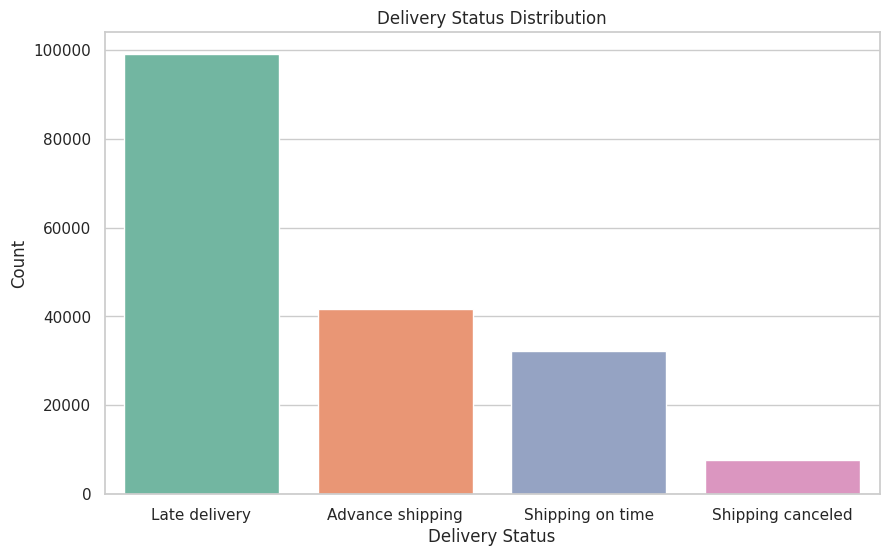

In [ ]:
delivery_status_data = dfData['delivery_status']

# Summary Statistics
delivery_status_summary = delivery_status_data.value_counts()

# Visualization
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(data=dfData, x='delivery_status', order=delivery_status_summary.index, palette='Set2')
plt.title('Delivery Status Distribution')
plt.xlabel('Delivery Status')
plt.ylabel('Count')

# Display summary statistics
print("Delivery Status Summary:")
print(delivery_status_summary)

16

In [ ]:
late_deliveries = dfData[dfData['delivery_status'] == 'Late delivery']

17

Cross-Tabulation (Contingency Table) with Percentages:
delivery_status  Advance shipping  Late delivery  Shipping canceled  \
shipping_mode                                                         
First Class              0.000000      95.322499           4.677501   
Same Day                 0.000000      45.743042           4.559926   
Second Class             0.000000      76.632781           4.003862   
Standard Class          38.599748      38.071683           4.268134   

delivery_status  Shipping on time  
shipping_mode                      
First Class              0.000000  
Same Day                49.697032  
Second Class            19.363358  
Standard Class          19.060435  


<Figure size 1200x800 with 0 Axes>

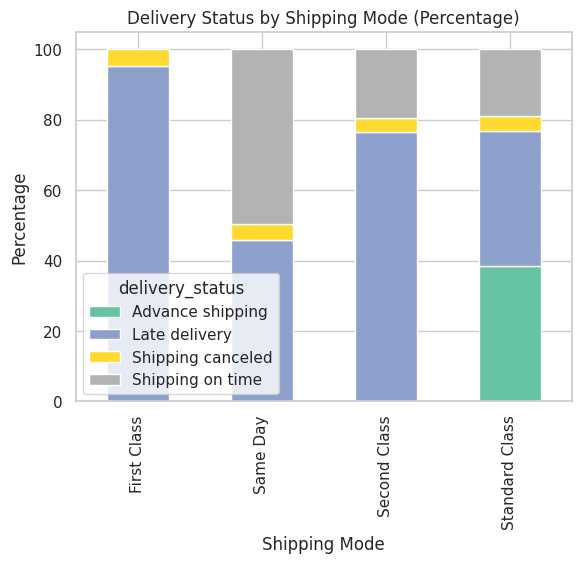

In [ ]:
delivery_status_data = dfData['delivery_status']
shipping_mode_data = dfData['shipping_mode']

# Create a cross-tabulation (contingency table) to analyze the relationship
cross_tab = pd.crosstab(shipping_mode_data, delivery_status_data)

# Calculate row percentages
cross_tab_percent = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Visualize the cross-tabulation as a stacked bar chart with percentages
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
cross_tab_percent.plot(kind="bar", stacked=True, colormap='Set2')
plt.title('Delivery Status by Shipping Mode (Percentage)')
plt.xlabel('Shipping Mode')
plt.ylabel('Percentage')

# Display the cross-tabulation with percentages
print("Cross-Tabulation (Contingency Table) with Percentages:")
print(cross_tab_percent)

18

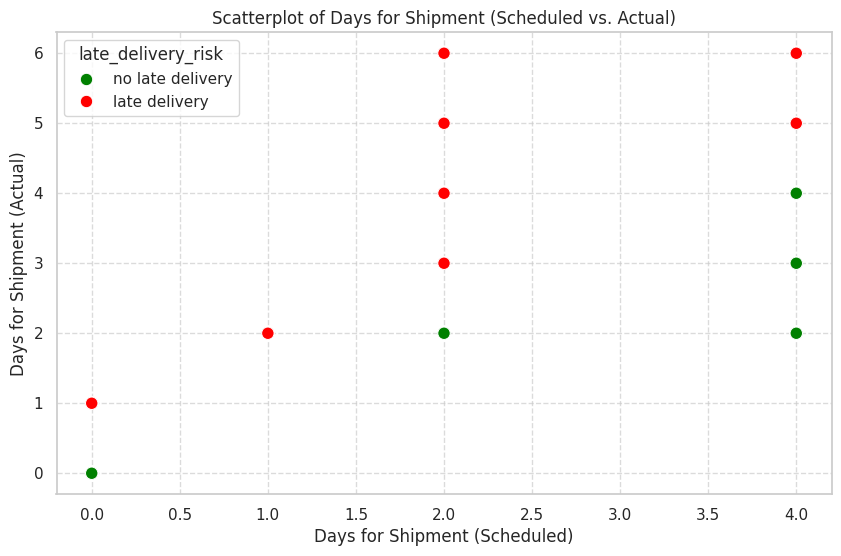

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
dfData['late_delivery_risk'] = dfData['late_delivery_risk'].map({0: 'no late delivery', 1: 'late delivery'})

palette = {'no late delivery': 'green', 'late delivery': 'red'}

scatter = sns.scatterplot(x="days_for_shipment_scheduled", y="days_for_shipping_real", hue="late_delivery_risk", data=dfData, palette=palette, s=80)
plt.title('Scatterplot of Days for Shipment (Scheduled vs. Actual)')
plt.xlabel('Days for Shipment (Scheduled)')
plt.ylabel('Days for Shipment (Actual)')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

19

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

20

In [ ]:
train_Data = dfData.copy()

21

In [ ]:
train_Data['late_delivery']=np.where(train_Data['delivery_status'] == 'Late delivery', 1, 0)

22

In [ ]:
train_Data.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date_dateorders,shipping_mode,customer_full_name,late_delivery
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,no late delivery,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,late delivery,73,Sporting Goods,Caguas,...,Rajastán,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,no late delivery,73,Sporting Goods,San Jose,...,Rajastán,CLOSED,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class,GillianMaldonado,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,no late delivery,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class,TanaTate,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,no late delivery,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class,OrliHendricks,0


23

In [ ]:
train_data=train_Data.drop(['delivery_status','late_delivery_risk'], axis=1) #Dropping columns with repeated values

24

In [ ]:
train_data.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,...,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date_dateorders,shipping_mode,customer_full_name,late_delivery
0,DEBIT,3,4,91.250000,314.640015,73,Sporting Goods,Caguas,Puerto Rico,20755,...,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,0
1,TRANSFER,5,4,-249.089996,311.359985,73,Sporting Goods,Caguas,Puerto Rico,19492,...,Rajastán,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1
2,CASH,4,4,-247.779999,309.720001,73,Sporting Goods,San Jose,EE. UU.,19491,...,Rajastán,CLOSED,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class,GillianMaldonado,0
3,DEBIT,3,4,22.860001,304.809998,73,Sporting Goods,Los Angeles,EE. UU.,19490,...,Queensland,COMPLETE,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class,TanaTate,0
4,PAYMENT,2,4,134.210007,298.250000,73,Sporting Goods,Caguas,Puerto Rico,19489,...,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class,OrliHendricks,0


25

In [ ]:
train_data.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'category_id',
       'category_name', 'customer_city', 'customer_country', 'customer_id',
       'customer_segment', 'customer_state', 'department_id',
       'department_name', 'latitude', 'longitude', 'market', 'order_city',
       'order_country', 'order_customer_id', 'order_date_dateorders',
       'order_id', 'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'shipping_date_dateorders',
       'shipping_mode', 'customer_full_name', 'late_delivery'],
      dtype='object')

26

In [ ]:

# List of columns to encode
columns_to_encode = [
    'customer_country', 'market', 'type', 'product_name', 'customer_segment',
    'customer_state', 'order_region', 'order_city', 'category_name',
    'customer_city', 'department_name', 'order_state', 'order_status',
    'shipping_mode', 'order_country', 'customer_full_name'
]

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode categorical columns
for col in columns_to_encode:
    train_data[col] = le.fit_transform(train_data[col])

27

In [ ]:
data=train_data.drop(['shipping_date_dateorders','order_date_dateorders'],axis=1)

28

In [ ]:
xlatedelivery=data .loc[:, data .columns != 'late_delivery']
ylatedelivery=data['late_delivery']
xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test = train_test_split(xlatedelivery,ylatedelivery,test_size = 0.3, random_state = 42)

29

In [ ]:
scaler = StandardScaler()
xlatedelivery_train = scaler.fit_transform(xlatedelivery_train)
xlatedelivery_test = scaler.transform(xlatedelivery_test)

30

In [ ]:
def classifiermodel(model_latedelivery, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test):
    model_latedelivery = model_latedelivery.fit(xlatedelivery_train, ylatedelivery_train)
    ylatedelivery_pred = model_latedelivery.predict(xlatedelivery_test)
    accuracy_latedelivery = accuracy_score(ylatedelivery_pred, ylatedelivery_test)
    recall_latedelivery = recall_score(ylatedelivery_pred, ylatedelivery_test)
    conf_latedelivery = confusion_matrix(ylatedelivery_test, ylatedelivery_pred)
    f1_latedelivery = f1_score(ylatedelivery_test, ylatedelivery_pred)
    print('Model paramters used are:', model_latedelivery)
    print('Accuracy of late delivery status is:', accuracy_latedelivery * 100, '%')
    print('Recall score of late delivery status is:', recall_latedelivery * 100, '%')
    print('F1 score of late delivery status is:', f1_latedelivery * 100, '%')
    print('Conf Matrix of late delivery status is:\n', conf_latedelivery)

31

In [ ]:
# Initialize and train the models
model_latedelivery_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
classifiermodel(model_latedelivery_rf, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

model_latedelivery_svm = LinearSVC()
classifiermodel(model_latedelivery_svm, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

model_latedelivery_lr = LogisticRegression(solver='lbfgs', random_state=0)
classifiermodel(model_latedelivery_lr, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

model_latedelivery_lda = LinearDiscriminantAnalysis()
classifiermodel(model_latedelivery_lda, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

model_latedelivery_nb = GaussianNB()
classifiermodel(model_latedelivery_nb, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

Model paramters used are: RandomForestClassifier(max_depth=10, random_state=0)
Accuracy of late delivery status is: 99.7728783514292 %
Recall score of late delivery status is: 99.58818802732021 %
F1 score of late delivery status is: 99.79366916612149 %
Conf Matrix of late delivery status is:
 [[24288   123]
 [    0 29745]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model paramters used are: LinearSVC()
Accuracy of late delivery status is: 98.25319447521974 %
Recall score of late delivery status is: 96.93295524917701 %
F1 score of late delivery status is: 98.43444874722802 %
Conf Matrix of late delivery status is:
 [[23470   941]
 [    5 29740]]
Model paramters used are: LogisticRegression(random_state=0)
Accuracy of late delivery status is: 98.24950144028362 %
Recall score of late delivery status is: 96.93275530493172 %
F1 score of late delivery status is: 98.43108698530386 %
Conf Matrix of late delivery status is:
 [[23470   941]
 [    7 29738]]
Model paramters used are: LinearDiscriminantAnalysis()
Accuracy of late delivery status is: 96.20540660314647 %
Recall score of late delivery status is: 96.25793518209154 %
F1 score of late delivery status is: 96.55634687892753 %
Conf Matrix of late delivery status is:
 [[23291  1120]
 [  935 28810]]
Model paramters used are: GaussianNB()
Accuracy of late delivery status is: 84.98227343230667 %
Recall sc

32

In [ ]:

# Create a DataFrame to compare classification results
Classification_data = {
    'Classification Model': ['Random Forest Classification', 'Support Vector Machines', 'Logistic Classification Model',
                             'Linear Discriminant Analysis', 'Gaussian Naive Bayes Model'],
    'Accuracy': [99.44419824211536, 98.25688751015585, 98.24950144028362, 96.20540660314647, 94.58416426619397],
    'Recall': [98.99820275577447, 96.93315516735652, 96.93275530493172, 96.25793518209154, 91.21879227647275],
    'F1': [99.4965797528056, 98.4378102866221, 98.43108698530386, 96.55634687892753, 95.28979106778654],
    'TN': [24110, 23470, 23470, 23291, 21555],
    'FP': [301, 941, 941, 1120, 2856],
    'FN': [0, 3, 7, 935, 77],
    'TP': [29745, 29742, 29738, 28810, 29668]
}

Classification_comparision = pd.DataFrame(Classification_data, columns=['Classification Model', 'Accuracy', 'Recall', 'F1', 'TN', 'FP', 'FN', 'TP'])

Classification_comparision

,Classification Model,Accuracy,Recall,F1,TN,FP,FN,TP
0,Random Forest Classification,99.444198,98.998203,99.496580,24110,301,0,29745
1,Support Vector Machines,98.256888,96.933155,98.437810,23470,941,3,29742
2,Logistic Classification Model,98.249501,96.932755,98.431087,23470,941,7,29738
3,Linear Discriminant Analysis,96.205407,96.257935,96.556347,23291,1120,935,28810
4,Gaussian Naive Bayes Model,94.584164,91.218792,95.289791,21555,2856,77,29668


33

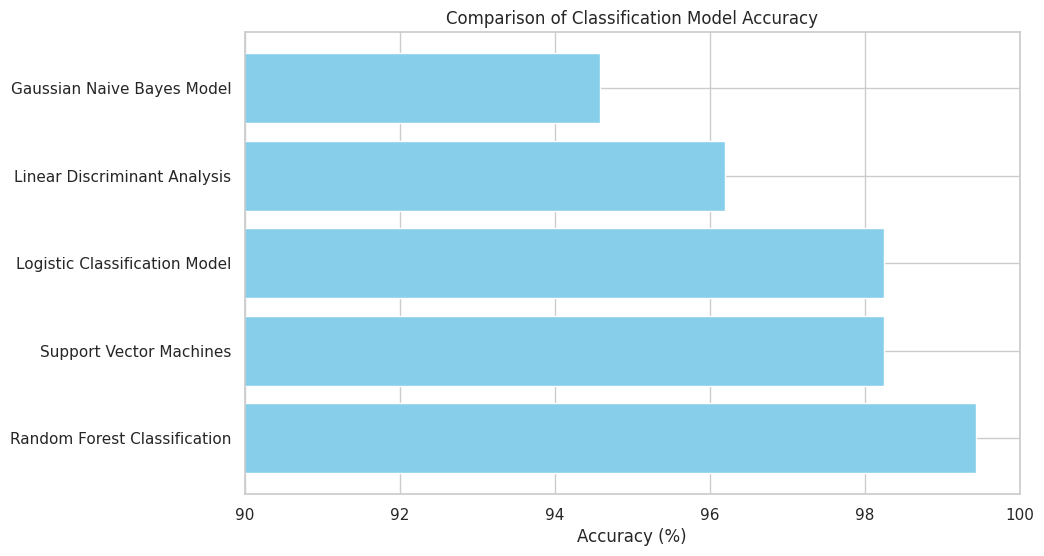

In [ ]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Plot accuracy comparison
plt.barh(Classification_comparision['Classification Model'], Classification_comparision['Accuracy'], color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Comparison of Classification Model Accuracy')
plt.xlim(90, 100)  # Set the x-axis limit to show accuracy percentage

# Show plot
plt.show()

34

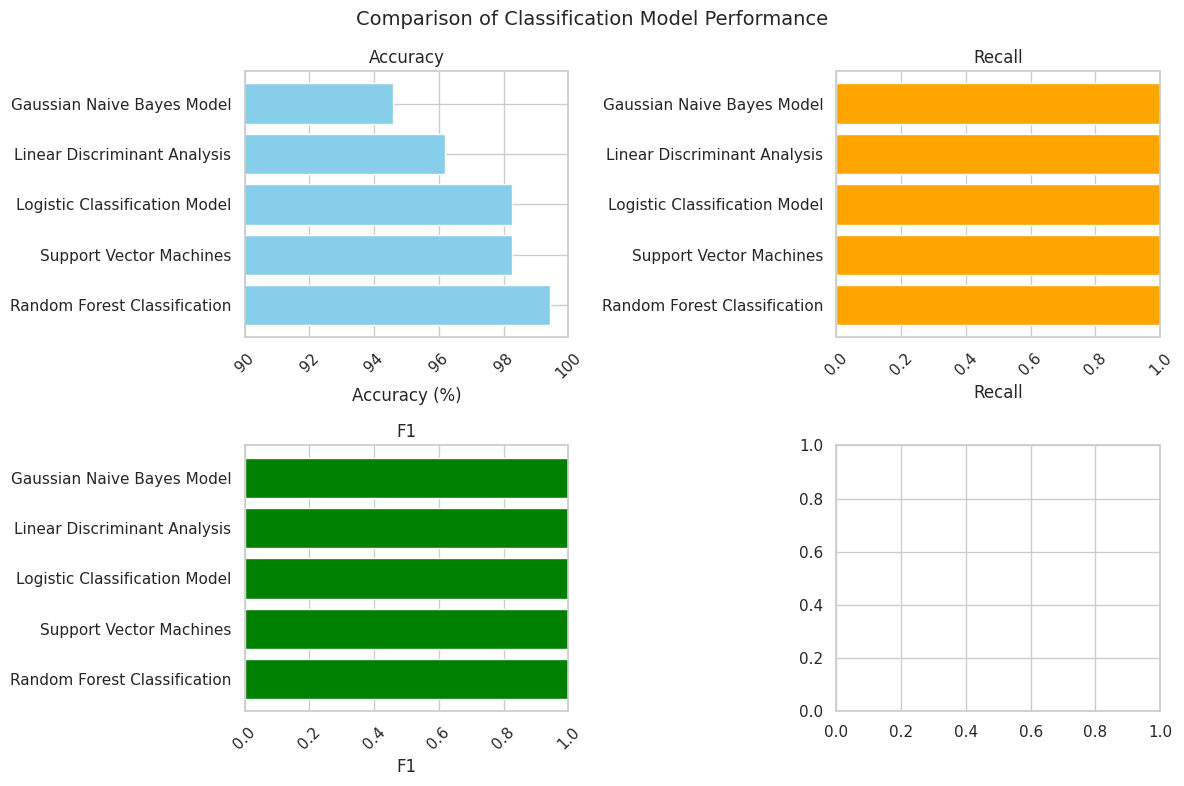

In [ ]:
import matplotlib.pyplot as plt

# Define metrics list
metrics_list = ['Accuracy', 'Recall', 'F1']

# Number of rows and columns for subplots
rows = 2  # Adjust rows based on the number of metrics
cols = 2  # Adjust columns if needed

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))  # Adjust figsize for better visualization

# Color list for multiple models
colors = ['skyblue', 'orange', 'green', 'red', 'purple']

# Counter for color assignment
color_counter = 0

# Loop through metrics and subplots
for i in range(rows):
  for j in range(cols):
    if i * cols + j >= len(metrics_list):
      continue  # Skip unused subplots if there are fewer metrics than subplots

    metric = metrics_list[i * cols + j]

    # Plot bar chart
    axes[i, j].barh(Classification_comparision['Classification Model'], Classification_comparision[metric], color=colors[color_counter])

    # Customize labels and limits based on the metric
    axes[i, j].set_xlabel(f'{metric} (%)' if metric == 'Accuracy' else f'{metric}')
    axes[i, j].set_xlim([0, 1] if metric in ['Recall', 'F1'] else [90, 100])  # Set limits

    # Rotate x-axis labels for better readability
    axes[i, j].set_xticks(axes[i, j].get_xticks())
    axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=45)

    # Title for each subplot
    axes[i, j].set_title(metric)

    color_counter += 1  # Update color counter for next iteration

# Adjust layout (optional)
fig.suptitle('Comparison of Classification Model Performance', fontsize=14)
plt.tight_layout()  # Adjust spacing between subplots

# Show plot
plt.show()


35

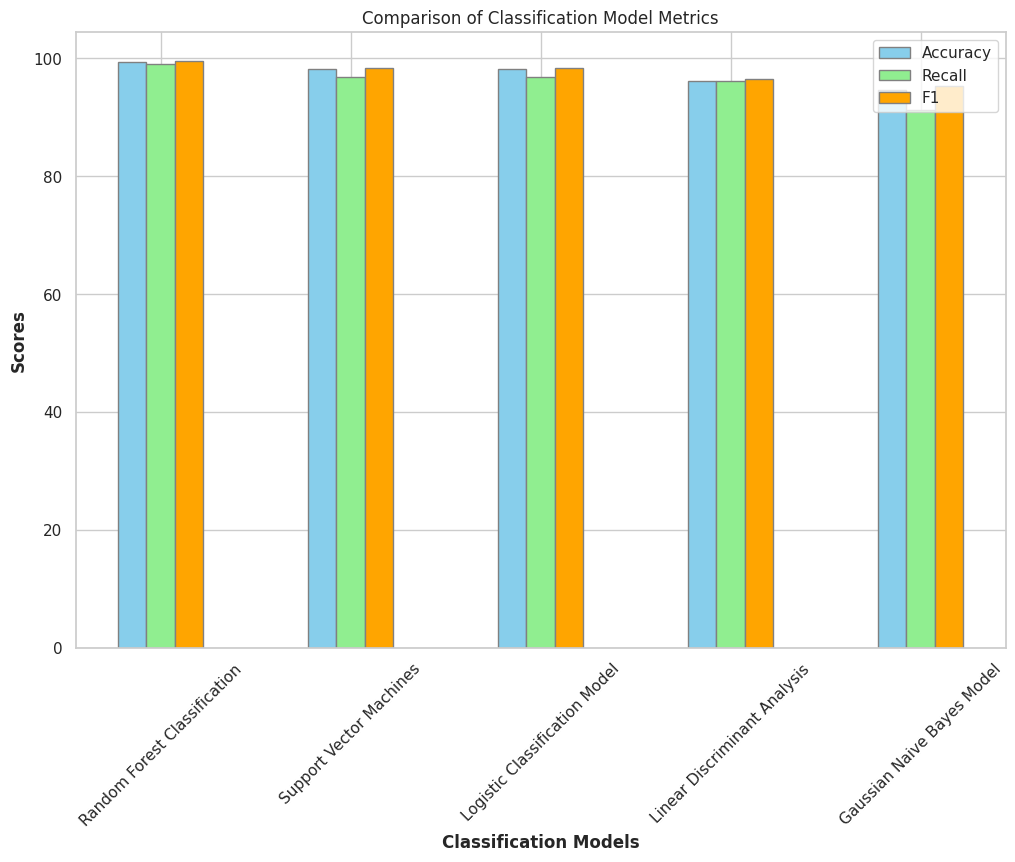

In [ ]:
import numpy as np

# Set the width of the bars
barWidth = 0.15

# Set the position of the bars on the x-axis
r1 = np.arange(len(Classification_comparision))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Plotting the bars
plt.figure(figsize=(12, 8))

plt.bar(r1, Classification_comparision['Accuracy'], color='skyblue', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r2, Classification_comparision['Recall'], color='lightgreen', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, Classification_comparision['F1'], color='orange', width=barWidth, edgecolor='grey', label='F1')

# Adding labels and title
plt.xlabel('Classification Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(Classification_comparision))], Classification_comparision['Classification Model'], rotation=45)
plt.title('Comparison of Classification Model Metrics')
plt.legend()

# Show plot
plt.show()


36

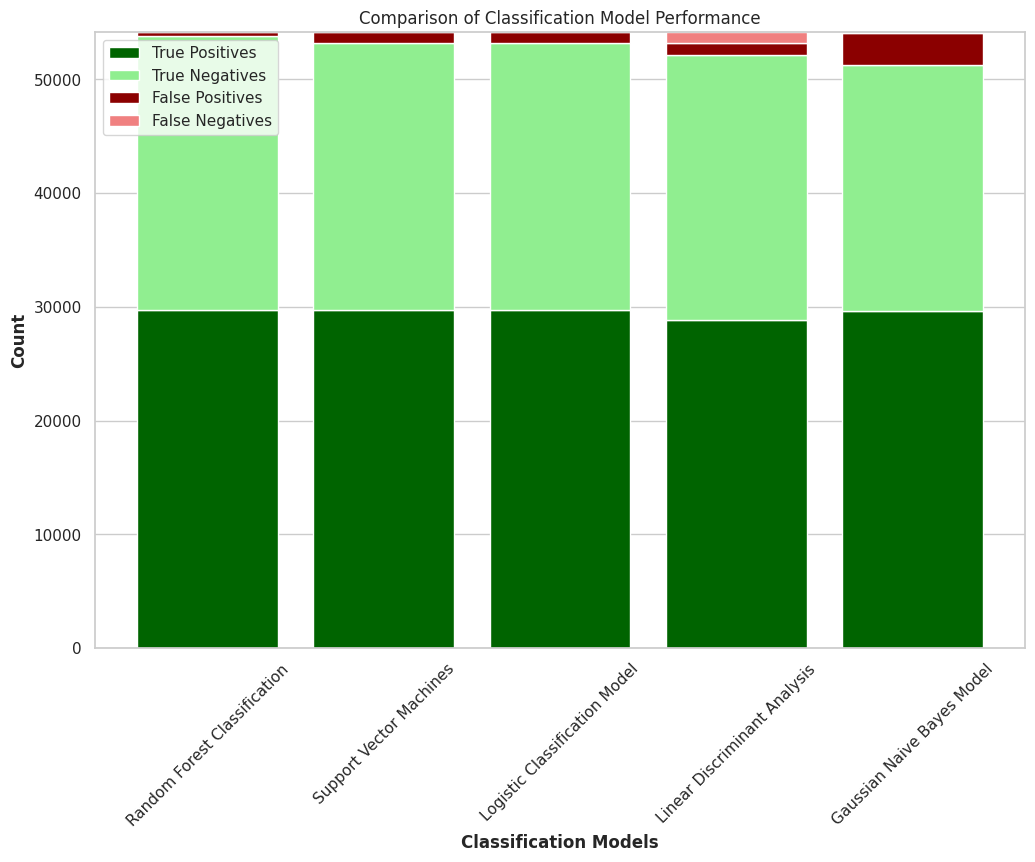

In [ ]:
# Set the position of the bars on the x-axis
r = np.arange(len(Classification_comparision))

# Plotting the bars
plt.figure(figsize=(12, 8))

plt.bar(r, Classification_comparision['TP'], color='darkgreen', width=0.8, edgecolor='white', label='True Positives')
plt.bar(r, Classification_comparision['TN'], bottom=Classification_comparision['TP'], color='lightgreen', width=0.8, edgecolor='white', label='True Negatives')
plt.bar(r, Classification_comparision['FP'], bottom=Classification_comparision['TP'] + Classification_comparision['TN'], color='darkred', width=0.8, edgecolor='white', label='False Positives')
plt.bar(r, Classification_comparision['FN'], bottom=Classification_comparision['TP'] + Classification_comparision['TN'] + Classification_comparision['FP'], color='lightcoral', width=0.8, edgecolor='white', label='False Negatives')

# Adding labels and title
plt.xlabel('Classification Models', fontweight='bold')
plt.xticks([r for r in range(len(Classification_comparision))], Classification_comparision['Classification Model'], rotation=45)
plt.ylabel('Count', fontweight='bold')
plt.title('Comparison of Classification Model Performance')
plt.legend()

# Show plot
plt.show()


37

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix


def evaluate_and_compare_models(data, target, model_names, metric_names):
    """
    Evaluates and compares the performance of multiple classification models.

    Args:
        data (pd.DataFrame): The DataFrame containing the features for modeling.
        target (str): The name of the target column in the DataFrame.
        model_names (list): A list of names for the classification models.
        metric_names (list): A list of names for the evaluation metrics.

    Returns:
        pd.DataFrame: A DataFrame containing the performance metrics for each model.
    """

    X = data.drop(target, axis=1)  # Separate features from target variable
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)

    models = [
        LogisticRegression(),
        LinearDiscriminantAnalysis(),
        GaussianNB(),
        RandomForestClassifier(),
        LinearSVC(),
        XGBClassifier(),
        KNeighborsClassifier(),
        DecisionTreeClassifier()
    ]

    model_results = {}
    for model_name, model in zip(model_names, models):
        model.fit(X_train_scaled, y_train_encoded)
        y_pred = model.predict(X_test_scaled)
        model_results[model_name] = {}
        for metric_name in metric_names:
            if metric_name == 'Accuracy':
                model_results[model_name][metric_name] = accuracy_score(y_test_encoded, y_pred)
            elif metric_name == 'Recall':
                model_results[model_name][metric_name] = recall_score(y_test_encoded, y_pred)
            elif metric_name == 'F1':
                model_results[model_name][metric_name] = f1_score(y_test_encoded, y_pred)
            else:
                raise ValueError(f"Invalid metric name: {metric_name}")

    comparison_df = pd.DataFrame(model_results).transpose()
    return comparison_df


# Assuming your data is in a DataFrame named 'data' and your target column is named 'delivery_status' (replace if needed)
model_names = [
    'Logistic Regression', 'Linear Discriminant Analysis', 'Gaussian Naive Bayes',
    'Random Forest', 'Support Vector Machine (Linear SVC)', 'XGBoost', 'K-Nearest Neighbors', 'Decision Tree'
]
metric_names = ['Accuracy', 'Recall', 'F1']
comparison_df = evaluate_and_compare_models(data, 'delivery_status', model_names, metric_names)  # Modify column names as needed

print(comparison_df)  # Print the comparison DataFrame

# Create subplots for visualization (optional)
num_metrics = len(metric_names)
num_rows = (num_metrics + 1) // 2  # Adjust rows for even distribution
num_cols = 2 if num_metrics > 2 else 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'magenta', 'brown', ']




SyntaxError: unterminated string literal (detected at line 85) (<ipython-input-115-4ea6029688c0>, line 85)